In [21]:
import warnings
import numpy as np
import sklearn.metrics as metrics
from utility import plot_history
warnings.filterwarnings("ignore")

In [5]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

## DNN
One of deep learning's main advantages over other machine learning algorithms is its capacity to execute feature engineering on it own. A deep learning algorithm will scan the data to search for features that correlate and combine them to enable faster learning without being explicitly told to do so. We use regressor from the keras library


In [6]:
from keras.models import Sequential
from keras.layers import Dense

def baseline_model(input_dim):
    regressor = Sequential()
    regressor.add(Dense(units=20, activation='relu', input_dim=input_dim)) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=1))
    regressor.compile(loss='mean_squared_error', optimizer='adam')
    return regressor

Using TensorFlow backend.


In [7]:
from dataset import suny_international
df = suny_international.load_data()
df_train,df_test = suny_international.train_test_split(df)

In [26]:
X=np.array(df_train.index.minute+df_train.index.hour*60).reshape(-1,1)
y=np.array(df_train['GHI'])
X_val=np.array(df_test.index.minute+df_test.index.hour*60).reshape(-1,1)
y_val=np.array(df_test['GHI'])
model = baseline_model(1)
history=model.fit(X,y,validation_data=(X_val,y_val),epochs=40,verbose=False)
model.save('models/simple_dnn_daily.h5')
simple_dnn_daily = history

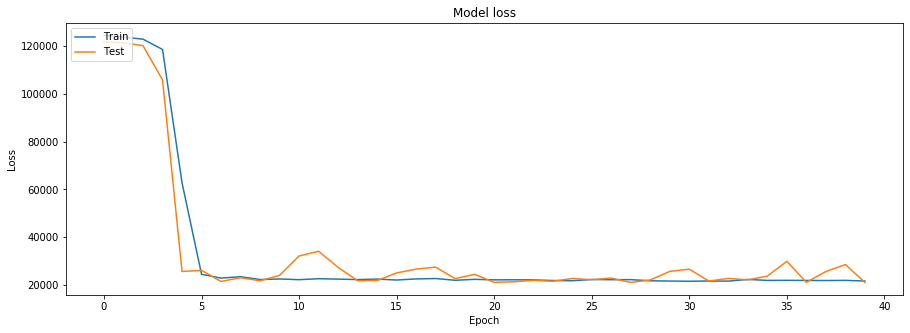

21047.47312229104


In [27]:
plot_history(history)
print(history.history['val_loss'][-1])

In [28]:
X=np.array([df_train.index.minute+df_train.index.hour*60,df_train.index.month]).T
y=np.array(df_train['GHI'])
X_val=np.array([df_test.index.minute+df_test.index.hour*60,df_test.index.month]).T
y_val=np.array(df_test['GHI'])
model = baseline_model(X.shape[-1])
history=model.fit(X,y,validation_data=(X_val,y_val),epochs=40,verbose=False)
model.save('models/simple_dnn_monthly.h5')
simple_dnn_monthly = history

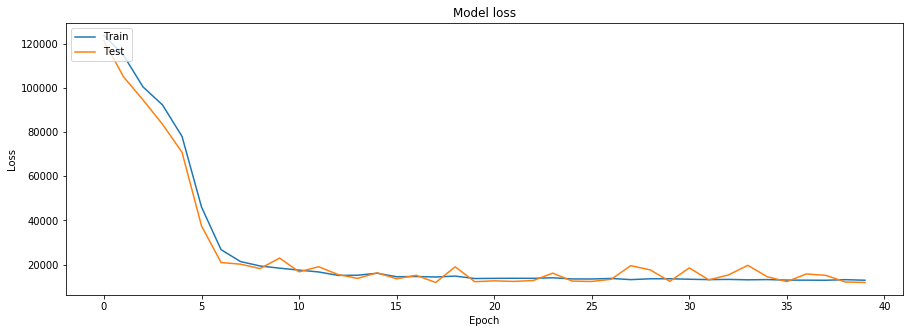

11933.196431693857


In [29]:
plot_history(history)
print(history.history['val_loss'][-1])

In [32]:
X=np.array([df_train.index.minute+df_train.index.hour*60,
            df_train.index.month,
            *(df_train[factor] for factor in suny_international.atmospheric_factors)]).T
y=np.array(df_train['GHI'])
X_val=np.array([df_test.index.minute+df_test.index.hour*60,
            df_test.index.month,
            *(df_test[factor] for factor in suny_international.atmospheric_factors)]).T
y_val=np.array(df_test['GHI'])
model = baseline_model(X.shape[-1])
history=model.fit(X,y,validation_data=(X_val,y_val),epochs=40,verbose=False)
model.save('models/simple_dnn_atmospheric.h5')
simple_dnn_atmospheric = history

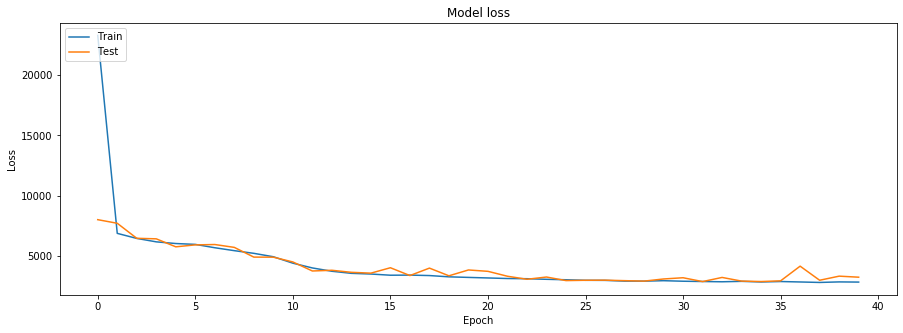

3221.1262651905076


In [33]:
plot_history(history)
print(history.history['val_loss'][-1])

<BarContainer object of 3 artists>

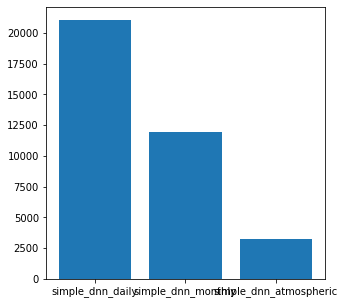

In [37]:
plt.rcParams['figure.figsize'] = [5, 5]
loss=[history.history['val_loss'][-1] for history in (simple_dnn_daily,simple_dnn_monthly,simple_dnn_atmospheric)]
plt.bar(('simple_dnn_daily','simple_dnn_monthly','simple_dnn_atmospheric'),loss)